## **Neural Network Regression with Medical Cost personal dataset**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
sns.set()

#### **Dataset link** https://github.com/stedy/Machine-Learning-with-R-datasets

In [2]:
raw_file = pd.read_csv("../dataset/regression/insurance/insurance.csv")
raw_file.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Create a culumn transformer

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'] )
)

In [4]:
# Create X and y

X = raw_file.drop('charges', axis=1)
y = raw_file['charges']

print(X.head())
print(y.head())

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [5]:
# Create test and train datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [6]:
# fit the column transformer to training data
ct.fit(X_train)

# transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [7]:
X_train_normal.shape, X_test_normal.shape

((1070, 11), (268, 11))

In [8]:
X_train.shape, X_test.shape

((1070, 6), (268, 6))

#### **Building the deep learning model**

In [9]:
tf.random.set_seed(42)

# 1. Create a sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae']
)

# 3. fit the model
history = model.fit(X_train_normal, y_train, epochs=100)

2022-01-12 05:20:11.132655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 05:20:11.442790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-01-12 05:20:11.524028: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-01-12 05:20:11.524912: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library

Epoch 1/100
34/34 [==============================] - 1s 976us/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 713us/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 708us/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 690us/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 751us/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 713us/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 770us/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 729us/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 695us/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 787us/s

In [10]:
# evaluate the model
# model.evaluate(X_test_normal, y_test)

In [11]:
# model.summary()

In [12]:
model_pred = model.predict(X_test_normal)

In [13]:
model_pred_squeezed = tf.squeeze(model_pred)
model_pred_squeezed.shape

TensorShape([268])

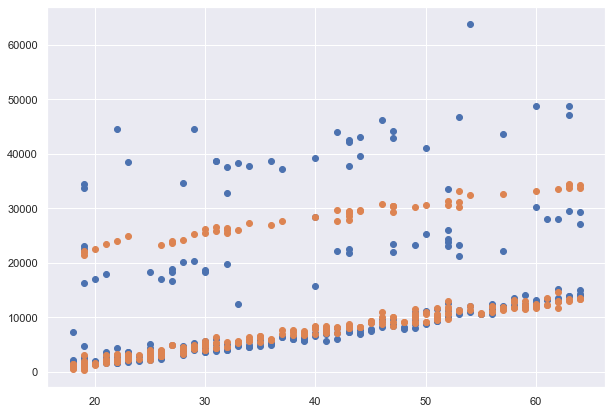

In [14]:
test_age = X_test['age']

plt.figure(figsize=[10, 7])
plt.scatter(test_age, pd.DataFrame(y_test))
plt.scatter(test_age, model_pred_squeezed.numpy())
plt.show()

### **Plot history (aka Loss Curve or Training curve)**

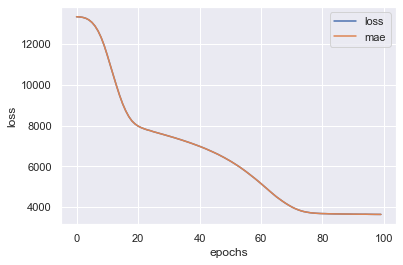

In [15]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()